# Gradient-Boosted Decision Trees

### On Binary Dataset

In [1]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
%matplotlib notebook

<IPython.core.display.Javascript object>


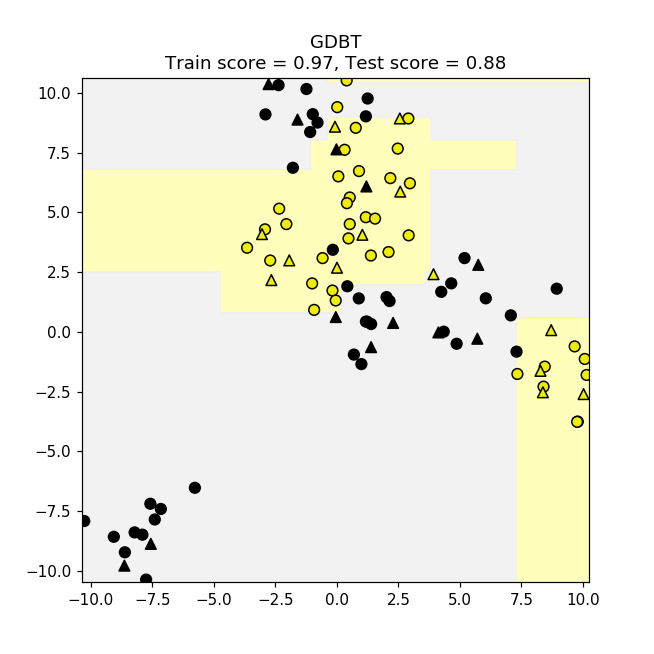

In [2]:
X_D2, y_D2 = make_blobs(n_samples=100, n_features=2, centers=8, cluster_std=1.3, random_state=0)
y_D2 = y_D2 % 2
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
clf_GBDT = GradientBoostingClassifier(n_estimators=10, learning_rate=0.2).fit(X_train, y_train)
fig, subaxes = plt.subplots(1,1, figsize = (6,6))
plot_class_regions_for_classifier_subplot(clf_GBDT, X_train, y_train, X_test, y_test, 'GDBT', subaxes, )


### On Fruit Dataset

In [3]:
fruit = pd.read_table('fruit_data_with_colors.txt')
fruit.columns


Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

<IPython.core.display.Javascript object>


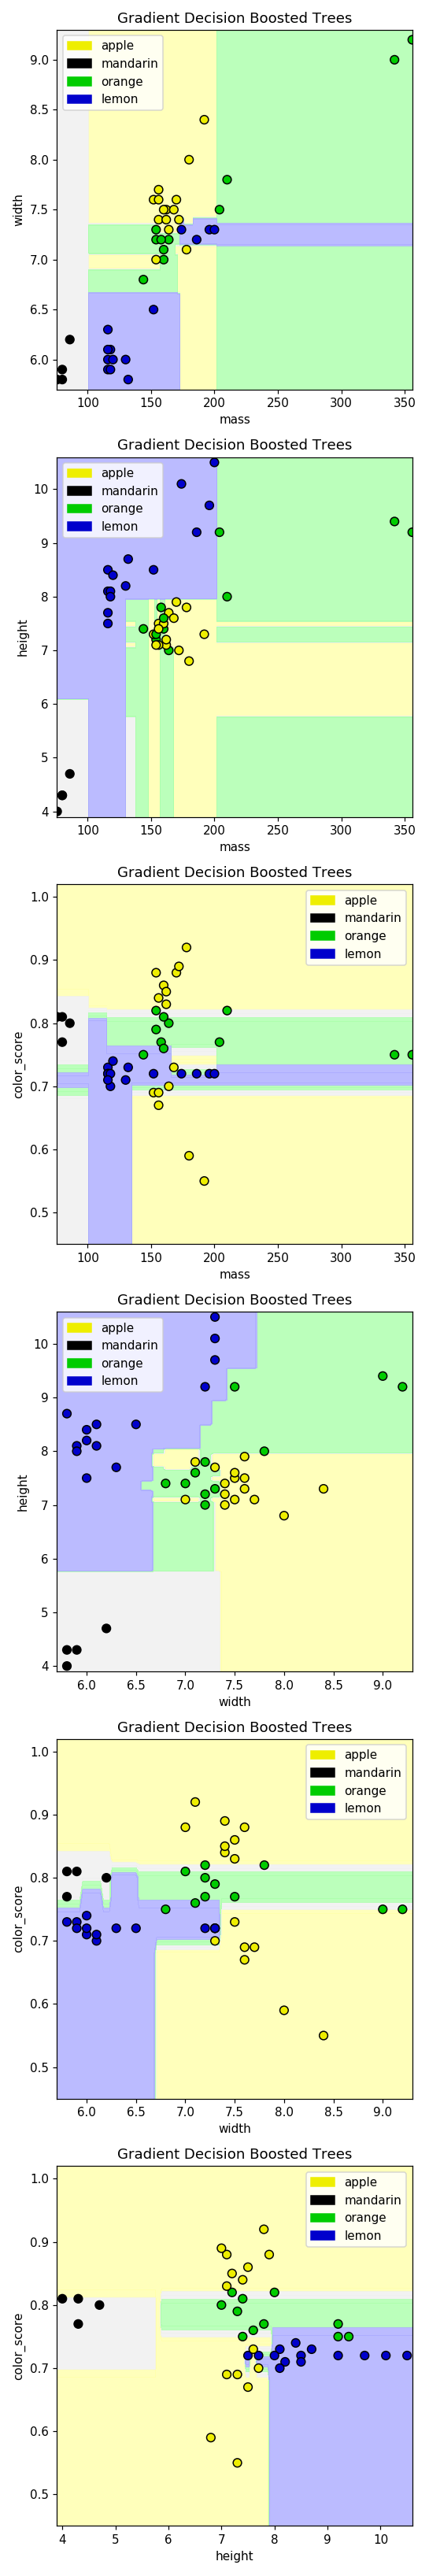

GBDT score on train set: 1.00
GBDT score on test set: 0.80


In [4]:
fruit_feature_names = ['mass', 'width', 'height', 'color_score']
fruit_target_names = ['apple', 'mandarin', 'orange', 'lemon']
X_fruit = fruit[fruit_feature_names]
y_fruit = fruit['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X_fruit.values, y_fruit.values, random_state = 0)
pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]
fig, subaxes = plt.subplots(6, 1, figsize = (5, 30))
for pair, axis in zip(pair_list, subaxes):
    X_tr = X_train[:, pair]
    X_te = X_test[:, pair]
    clf_GBDT = GradientBoostingClassifier().fit(X_tr, y_train)
    plot_class_regions_for_classifier_subplot(clf_GBDT, X_tr, y_train, None, None, 'Gradient Decision Boosted Trees',
                                             axis, fruit_target_names)
    axis.set_xlabel(fruit_feature_names[pair[0]])
    axis.set_ylabel(fruit_feature_names[pair[1]])
plt.tight_layout()
plt.show()
clf_GBDT = GradientBoostingClassifier().fit(X_train, y_train)
print('GBDT score on train set: {:.2f}'.format(clf_GBDT.score(X_train, y_train)))
print('GBDT score on test set: {:.2f}'.format(clf_GBDT.score(X_test, y_test)))

### Gradient Boosted Decision Tree on Real Dataset

In [5]:
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import plot_class_regions_for_classifier
from sklearn.metrics import confusion_matrix
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y=True) 
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
print('Accuracy of GBDT on real train dataset: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of GBDT on real test dataset: {:.2f}'.format(clf.score(X_test, y_test)))

clf = GradientBoostingClassifier(learning_rate=0.01, max_depth=2, random_state = 0)
clf.fit(X_train, y_train)
print('Accuracy of GBDT on real train dataset: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of GBDT on real test dataset: {:.2f}'.format(clf.score(X_test, y_test)))

clf_y_predicted = clf.predict(X_test)
confusion = confusion_matrix(y_test, clf_y_predicted)
confusion


Accuracy of GBDT on real train dataset: 1.00
Accuracy of GBDT on real test dataset: 0.97
Accuracy of GBDT on real train dataset: 0.97
Accuracy of GBDT on real test dataset: 0.97


array([[49,  4],
       [ 1, 89]], dtype=int64)